In [495]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [496]:

grid_i = 7
grid_j = 10




#noise = np.random.choice(rang,1,prob)[0]
#wind = np.copy(wind)
#wind[np.where( wind > 0 )] += noise 

#possible action
up = 0
down = 1
left = 2
right = 3
up_left = 4
up_right = 5
down_left = 6
down_right = 7

#greedy policy parameter
epsilon = 0.1
#sarsa step size
alpha = 0.2
#reward for each step
reward = -1.0
gamma = 0.3
lam = 0.8
wind = [0,0,0,1,1,1,2,2,1,0]

start = [3,0]
end = [3,7]
standard_action = [up,down,left,right]
king_action = [up,down,left,right,up_left,up_right,down_left,down_right]

In [497]:
def step2(state,action):
    i,j = state
    rang = np.arange(-1,2) #[-1,0,1]
    prob = [1./3,1./3,1./3]
    wind = [0,0,0,1,1,1,2,2,1,0]
    noise = np.random.choice(rang,1,prob)[0]
    wind = np.copy(wind)
    wind[np.where(wind > 0)] += noise
    if action == up:
        return [max(i - 1 - wind[j], 0),j]
    elif action == down:
        return [max(min(i + 1 - wind[j], grid_i - 1), 0), j]
    elif action == left:
        return [max(i - wind[j], 0), max(j - 1, 0)]
    elif action == right:
        return [max(i - wind[j], 0), min(j + 1, grid_j -1)]
    elif action == up_left:
        return [max(i - 1 - wind[j], 0), max(j - 1, 0)]
    elif action == up_right:
        return [max(i - 1 - wind[j], 0),min(j + 1, grid_j -1)]
    elif action == down_left:
        return [max(min(i + 1 - wind[j], grid_i - 1), 0), max(j - 1, 0)]
    elif action == down_right:
        return [max(min(i + 1 - wind[j], grid_i - 1), 0),min(j + 1, grid_j -1)]
    else:
        return False

In [498]:
def step(state,action):
    i, j = state
    if action == up:
        return [max(i - 1 - wind[j], 0), j]
    elif action == down:
        return [max(min(i + 1 - wind[j], grid_i - 1), 0), j]
    elif action == left:
        return [max(i - wind[j], 0), max(j - 1, 0)]
    elif action == right:
        return [max(i - wind[j], 0), min(j + 1, grid_j - 1)]
    else:
        return False

In [499]:
def choose_a(state):
    if np.random.binomial(1, epsilon) == 1:
        action = np.random.choice(standard_action)
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
    return action

In [500]:
def episode_q_learning(q_value,ep):
    time = 0
    state = start
    action = choose_a(state)

    while state != end:
        next_state = step(state,action)
        next_action = choose_a(next_state)
        q_value[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_value[next_state[0], next_state[1], :]) - q_value[state[0],state[1],action])
        state = next_state
        action = next_action

        time +=1
    y[ep] = time

    return time,y

In [501]:
def episode_sarsa(q_value,ep):
    time = 0
    state = start
    action = choose_a(state)
    trajectory = [state]
  
    while state != end:
        next_state = step(state,action)
        next_action = choose_a(next_state)
        #sarsa update
        q_value[state[0], state[1], action] += alpha * (reward + gamma * q_value[next_state[0],next_state[1],next_action] - q_value[state[0],state[1],action])
        state = next_state
        action = next_action
        time +=1
        trajectory.append(state)
    y[ep] = time


    return time,y

In [502]:
# def SARSA_lambda(num_episodes=2000, epsilon=0.5, Y=0.0, learning_rate=0.05):
#     Q = np.zeros((n,m,8))
#     episode_tenth = np.ceil(num_episodes/10)
#     for episode in range(num_episodes):
#         E = np.zeros((n,m,8))
#         state = initial_state
#         while state!=goal_state:
#             action = get_next_action(Q=Q, state=state, mode='epsilon_greedy', epsilon=epsilon)
#             next_state = get_next_state(state=state, action=action)
#             next_action = get_next_action(Q=Q, state=next_state, mode='epsilon_greedy', epsilon=epsilon)
#             G = rewards[state] + Q[next_state][action_idx[next_action]] - Q[state][action_idx[action]]
#             E[state][action_idx[action]] += 1
#             Q += learning_rate * G * E
#             E *= Y
#             state = next_state
#         epsilon *= 0.99
#         if episode % episode_tenth == 0:
#             print(episode)
#     print(episode)
#     return Q,E

In [503]:
def sarsa_lambda(q_value,ep):
    time = 0
    state = start
    action = choose_a(state)
    e = np.zeros((grid_i,grid_j,4))
    while state != end:
        next_state = step(state,action)
        next_action = choose_a(next_state)
        error = reward + gamma * q_value[next_state[0],next_state[1],next_action] - q_value[state[0],state[1],action]
        e[state[0],state[1],action] += 1
        q_value[state[0],state[1],action] += alpha * error * e[state[0],state[1],action]
        e[state[0],state[1],action] = gamma * lam * e[state[0],state[1],action]
        state = next_state
        action = next_action
        time +=1
    y[ep] = time
    return time,y

In [504]:
def q_learning_lambda(q_value,ep):
    time = 0
    state = start
    action = choose_a(state)
    e = np.zeros((grid_i,grid_j,4))
    while state != end:
        next_state = step(state,action)
        next_action = choose_a(next_state)
       #q_value[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_value[next_state[0], next_state[1], :]) - q_value[state[0],state[1],action])
        best_a = np.argmax(q_value[next_state[0],next_state[1],:])
        error = reward + gamma * q_value[next_state[0],next_state[1],best_a] - q_value[state[0],state[1],action]
        e[state[0],state[1],action] += 1
        q_value[state[0],state[1],action] += alpha * error * e[state[0],state[1],action]
        if next_action == best_a:
            e[state[0],state[1],action] = gamma * lam * e[state[0],state[1],action]
        else:
            e[state[0],state[1],action] = 0
                
        state = next_state
        action = next_action
        time +=1
    y[ep] = time

        
    return time,y

In [505]:
def replacing_trace(state,action):
    e[state[0],state[1],action] = 1
    e[state[0],state[1],action] *= gamma * lam
    return e
   

In [506]:
episode_limit = 400
q_value = np.zeros((grid_i,grid_j,4))
e = np.zeros((grid_i,grid_j,4))
y = np.zeros((episode_limit,1))

#time,steps = episode_sarsa(q_value)
#print(steps)
#a = episode_sarsa(q_value)

steps = []
step2s = []
trace = []
ep = 0
#this is is to hold how many steps we need to reach the end

ets = np.zeros((episode_limit,1))
ets2 = np.zeros((episode_limit,1))


20 [[ 143.]
 [2440.]
 [ 917.]
 [ 394.]
 [ 594.]
 [ 222.]
 [ 211.]
 [ 357.]
 [ 481.]
 [ 342.]
 [  84.]
 [ 106.]
 [ 317.]
 [  45.]
 [ 202.]
 [ 171.]
 [  50.]
 [ 272.]
 [ 145.]
 [  71.]
 [ 204.]
 [ 167.]
 [  20.]
 [  52.]
 [  82.]
 [  71.]
 [ 266.]
 [  22.]
 [  34.]
 [ 183.]
 [  75.]
 [  38.]
 [  19.]
 [  35.]
 [  85.]
 [  75.]
 [ 136.]
 [ 123.]
 [  87.]
 [  29.]
 [  59.]
 [  21.]
 [  36.]
 [  25.]
 [  94.]
 [  57.]
 [  91.]
 [  23.]
 [  85.]
 [  61.]
 [  50.]
 [  21.]
 [  82.]
 [  91.]
 [  35.]
 [  54.]
 [  23.]
 [  55.]
 [ 133.]
 [  28.]
 [  26.]
 [  33.]
 [  47.]
 [  37.]
 [  26.]
 [  23.]
 [ 152.]
 [  28.]
 [  34.]
 [  25.]
 [  56.]
 [  23.]
 [  48.]
 [  21.]
 [  36.]
 [  92.]
 [  31.]
 [  46.]
 [  27.]
 [  19.]
 [  42.]
 [  30.]
 [  20.]
 [  25.]
 [  28.]
 [ 159.]
 [  74.]
 [  20.]
 [  32.]
 [  26.]
 [  53.]
 [  32.]
 [  54.]
 [  37.]
 [  40.]
 [  35.]
 [  26.]
 [  25.]
 [  34.]
 [  19.]
 [  62.]
 [  35.]
 [  30.]
 [  27.]
 [  26.]
 [  46.]
 [  61.]
 [  30.]
 [  95.]
 [  27.]
 [  29.

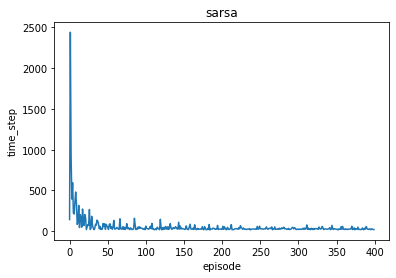

In [507]:

while ep < episode_limit:
    #a = episode_sarsa(q_value)
    time,y = episode_sarsa(q_value,ep)
#     steps.append(episode_sarsa(q_value))
    ets[ep] = time
    ep += 1
print(time,y)

steps = np.add.accumulate(steps)
step2s = np.add.accumulate(step2s)
print(ets[episode_limit-1])

x = np.arange(episode_limit)
plt.plot(x , y)
#plt.plot(step2s,np.arange(1, len(step2s) + 1))
plt.xlabel('episode')
plt.ylabel('time_step')
plt.title('sarsa')

plt.show()

26 [[ 825.]
 [1713.]
 [ 538.]
 [ 541.]
 [ 487.]
 [ 363.]
 [ 475.]
 [ 661.]
 [ 188.]
 [  34.]
 [ 378.]
 [  78.]
 [  97.]
 [ 412.]
 [  59.]
 [  33.]
 [ 154.]
 [ 259.]
 [  50.]
 [ 115.]
 [ 179.]
 [ 120.]
 [  49.]
 [ 187.]
 [  52.]
 [  74.]
 [  38.]
 [  76.]
 [ 277.]
 [  37.]
 [  64.]
 [  84.]
 [ 159.]
 [  25.]
 [  39.]
 [ 127.]
 [  91.]
 [  21.]
 [  40.]
 [  45.]
 [  25.]
 [ 157.]
 [  24.]
 [  37.]
 [  35.]
 [  49.]
 [ 125.]
 [  64.]
 [  20.]
 [  47.]
 [  72.]
 [  29.]
 [ 114.]
 [  47.]
 [  40.]
 [ 108.]
 [  25.]
 [  62.]
 [  19.]
 [  40.]
 [  47.]
 [  50.]
 [  19.]
 [  76.]
 [  22.]
 [ 112.]
 [  51.]
 [  17.]
 [  42.]
 [  29.]
 [  46.]
 [  31.]
 [  55.]
 [  29.]
 [  94.]
 [  42.]
 [  17.]
 [  25.]
 [  32.]
 [  21.]
 [  24.]
 [  23.]
 [  52.]
 [  41.]
 [  23.]
 [  24.]
 [  91.]
 [  48.]
 [  20.]
 [  32.]
 [  60.]
 [  65.]
 [  19.]
 [  78.]
 [  20.]
 [  22.]
 [  53.]
 [  19.]
 [  41.]
 [  33.]
 [  63.]
 [  58.]
 [  40.]
 [  61.]
 [  20.]
 [  24.]
 [  24.]
 [  35.]
 [  52.]
 [  31.]
 [  40.

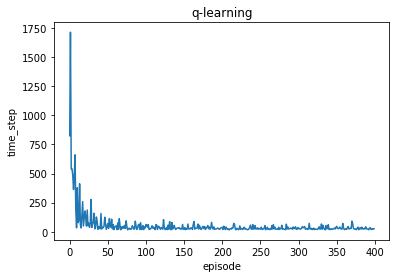

In [508]:
ep = 0
q_value = q_value = np.zeros((grid_i,grid_j,4))
while ep < episode_limit:
    #a = episode_sarsa(q_value)
    time,y = episode_q_learning(q_value,ep)
#     steps.append(episode_sarsa(q_value))
    ets[ep] = time
    ep += 1
print(time,y)
steps = np.add.accumulate(steps)
step2s = np.add.accumulate(step2s)
print(ets[episode_limit-1])

x = np.arange(episode_limit)
plt.plot(x , y)
#plt.plot(step2s,np.arange(1, len(step2s) + 1))
plt.xlabel('episode')
plt.ylabel('time_step')
plt.title('q-learning')

plt.show()

30 [[ 678.]
 [ 376.]
 [1522.]
 [ 414.]
 [ 679.]
 [ 223.]
 [ 382.]
 [ 157.]
 [ 448.]
 [ 186.]
 [  70.]
 [ 374.]
 [  75.]
 [ 159.]
 [ 246.]
 [ 128.]
 [ 177.]
 [ 182.]
 [  75.]
 [ 118.]
 [ 224.]
 [  48.]
 [  40.]
 [  86.]
 [  69.]
 [ 111.]
 [  32.]
 [  44.]
 [ 209.]
 [  17.]
 [ 137.]
 [  94.]
 [  22.]
 [  48.]
 [  37.]
 [  42.]
 [  60.]
 [  41.]
 [ 171.]
 [  20.]
 [  26.]
 [  69.]
 [  25.]
 [ 165.]
 [  46.]
 [  41.]
 [  87.]
 [  77.]
 [  90.]
 [  41.]
 [  38.]
 [  50.]
 [  50.]
 [  61.]
 [  83.]
 [  39.]
 [  31.]
 [  47.]
 [  15.]
 [  24.]
 [  50.]
 [  31.]
 [  76.]
 [  54.]
 [  23.]
 [  19.]
 [  39.]
 [ 112.]
 [  49.]
 [  53.]
 [  59.]
 [  40.]
 [  65.]
 [  39.]
 [ 109.]
 [  20.]
 [  59.]
 [  31.]
 [  27.]
 [  51.]
 [  55.]
 [  87.]
 [  20.]
 [  29.]
 [  18.]
 [  21.]
 [  25.]
 [  26.]
 [  21.]
 [  70.]
 [  37.]
 [  78.]
 [  36.]
 [  37.]
 [  65.]
 [  29.]
 [  49.]
 [  31.]
 [  24.]
 [  47.]
 [  22.]
 [  46.]
 [  28.]
 [  82.]
 [  29.]
 [  23.]
 [  26.]
 [  31.]
 [  47.]
 [  59.]
 [  35.

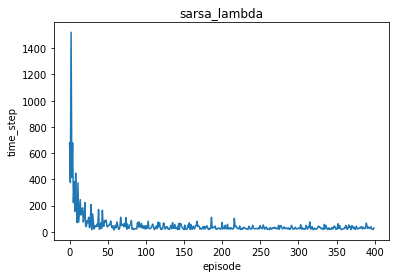

In [509]:
ep = 0
q_value = q_value = np.zeros((grid_i,grid_j,4))
while ep < episode_limit:
    #a = episode_sarsa(q_value)
    time,y = sarsa_lambda(q_value,ep)
#     steps.append(episode_sarsa(q_value))
    ets[ep] = time
    ep += 1
print(time,y)
# steps = np.add.accumulate(steps)
# step2s = np.add.accumulate(step2s)
print(ets[episode_limit-1])

x = np.arange(episode_limit)
plt.plot(x , y)
#plt.plot(step2s,np.arange(1, len(step2s) + 1))
plt.xlabel('episode')
plt.ylabel('time_step')
plt.title('sarsa_lambda')

plt.show()

24 [[1411.]
 [ 887.]
 [ 807.]
 [ 621.]
 [ 393.]
 [ 187.]
 [ 108.]
 [ 423.]
 [ 283.]
 [ 162.]
 [ 244.]
 [ 170.]
 [ 168.]
 [ 209.]
 [ 165.]
 [ 159.]
 [  74.]
 [  51.]
 [ 173.]
 [ 100.]
 [  77.]
 [ 176.]
 [  63.]
 [  58.]
 [ 220.]
 [  73.]
 [  38.]
 [  68.]
 [ 149.]
 [ 107.]
 [  88.]
 [  52.]
 [  33.]
 [ 121.]
 [  74.]
 [  29.]
 [ 125.]
 [  63.]
 [  34.]
 [  57.]
 [  31.]
 [  29.]
 [  58.]
 [  54.]
 [ 103.]
 [  56.]
 [  27.]
 [  70.]
 [  32.]
 [  21.]
 [ 110.]
 [  62.]
 [  48.]
 [  27.]
 [  49.]
 [  49.]
 [  33.]
 [  28.]
 [  27.]
 [ 127.]
 [  30.]
 [  29.]
 [  42.]
 [  25.]
 [  26.]
 [  41.]
 [  39.]
 [  51.]
 [  62.]
 [  66.]
 [  29.]
 [  27.]
 [  24.]
 [  81.]
 [  48.]
 [  96.]
 [  23.]
 [  44.]
 [  30.]
 [  31.]
 [  27.]
 [  41.]
 [  45.]
 [  21.]
 [  22.]
 [  74.]
 [  37.]
 [  30.]
 [  39.]
 [  28.]
 [  24.]
 [  42.]
 [ 102.]
 [  28.]
 [  31.]
 [  36.]
 [  40.]
 [  20.]
 [  24.]
 [  56.]
 [  19.]
 [  39.]
 [  22.]
 [  23.]
 [  86.]
 [  50.]
 [  45.]
 [  21.]
 [  31.]
 [  72.]
 [  18.

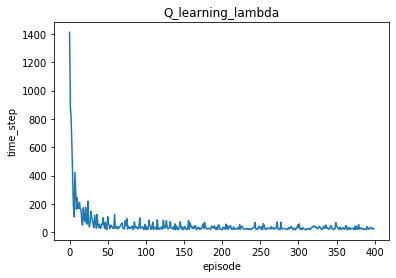

In [510]:
ep = 0
q_value = np.zeros((grid_i,grid_j,4))
while ep < episode_limit:
    #a = episode_sarsa(q_value)
    time,y = q_learning_lambda(q_value,ep)
#     steps.append(episode_sarsa(q_value))
    ets[ep] = time
    ep += 1
print(time,y)
# steps = np.add.accumulate(steps)
# step2s = np.add.accumulate(step2s)
print(ets[episode_limit-1])

x = np.arange(episode_limit)
plt.plot(x , y)
#plt.plot(step2s,np.arange(1, len(step2s) + 1))
plt.xlabel('episode')
plt.ylabel('time_step')
plt.title('Q_learning_lambda')

plt.show()